In [1]:
import illustris_python.groupcat as gc
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np
import h5py
import study_pairs_abacus as spa
import abacus_cosmos.Halos as ach
%matplotlib inline
plt.style.use('astroandes.mplstyle')

In [2]:
# Observational data

vlim = {'mean':627, 'sigma':22}

n_values = 1000
mu_values = np.zeros(n_values)
for i in range(n_values):
    l_cmb = np.deg2rad(264.0 + np.random.normal(loc=0.0, scale=10.0))  
    b_cmb = np.deg2rad(48.0 + np.random.normal(loc=0.0, scale=10.0))
    l_m31 = np.deg2rad(121.0 + np.random.normal(loc=0.0, scale=10.0))  
    b_m31 = np.deg2rad(-21 + np.random.normal(loc=0.0, scale=10.0))

    u_cmb = np.array([np.cos(l_cmb)*np.cos(b_cmb), np.sin(l_cmb) * np.cos(b_cmb), np.sin(b_cmb)])
    u_m31 = np.array([np.cos(l_m31)*np.cos(b_m31), np.sin(l_m31) * np.cos(b_m31), np.sin(b_m31)])

    mu_values[i]  = np.sum(u_cmb*u_m31)

mu = {}
mu['mean'] = np.mean(mu_values)
mu['sigma'] = np.std(mu_values)
print(mu)

{'mean': -0.7284435006900187, 'sigma': 0.13431949066867305}


In [18]:
n_boxes = 20
all_data = {}
for i in range(n_boxes):
    all_data[i] = spa.load_box(BoxID=i, fixed_cosmo=True)

data = {}
keys = ['vel_A_mag', 'vel_B_mag', 'pos_AB', 'vel_AB', 'vel_AB_rad', 'vel_AB_tan', 'vmax_A', 'vmax_B', 'mu', 'mu_vv']
for kk in keys:
    tmp = np.empty((0))
    for i in range(n_boxes):
        tmp = np.append(tmp, all_data[i][kk])
    data[kk] = tmp


Finished reading ../data/pairs_planck_00_box_00.hdf5
Finished reading ../data/pairs_planck_00_box_01.hdf5
Finished reading ../data/pairs_planck_00_box_02.hdf5
Finished reading ../data/pairs_planck_00_box_03.hdf5
Finished reading ../data/pairs_planck_00_box_04.hdf5
Finished reading ../data/pairs_planck_00_box_05.hdf5
Finished reading ../data/pairs_planck_00_box_06.hdf5
Finished reading ../data/pairs_planck_00_box_07.hdf5
Finished reading ../data/pairs_planck_00_box_08.hdf5
Finished reading ../data/pairs_planck_00_box_09.hdf5
Finished reading ../data/pairs_planck_00_box_10.hdf5
Finished reading ../data/pairs_planck_00_box_11.hdf5
Finished reading ../data/pairs_planck_00_box_12.hdf5
Finished reading ../data/pairs_planck_00_box_13.hdf5
Finished reading ../data/pairs_planck_00_box_14.hdf5
Finished reading ../data/pairs_planck_00_box_15.hdf5
Finished reading ../data/pairs_planck_00_box_16.hdf5
Finished reading ../data/pairs_planck_00_box_17.hdf5
Finished reading ../data/pairs_planck_00_box_1

In [52]:
# Selection in vmax and kinematics
ii = (data['vmax_A']<240) & (data['vmax_B']<240) 
ii &= (data['vel_AB_rad']<0) 
ii &= (np.abs(data['vel_AB_rad'])>np.abs(data['vel_AB_tan']))
print(np.count_nonzero(ii), np.mean(data['vel_A_mag']), np.std(data['vel_A_mag']))

29292 479.9711130111799 218.50897557405446


29292


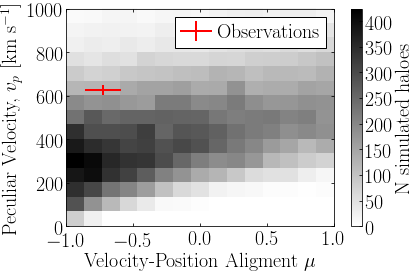

In [56]:
_ =plt.hist2d(data['mu'][ii], data['vel_A_mag'][ii], bins=15, range=[[-1,1], [0, 1000]], cmap='binary')
plt.errorbar([mu['mean']], [vlim['mean']], [vlim['sigma']], [mu['sigma']], color='red', label='Observations')
plt.colorbar(label='N simulated haloes')
plt.ylim(0,1000)
plt.xlim(-1,1)
plt.xlabel('Velocity-Position Aligment $\mu$')
plt.ylabel('Peculiar Velocity, $v_p$ [km s$^{-1}$]')
plt.legend()
bbox_inches="tight"

print(len(data['mu'][ii]))
plt.savefig("../paper/mu_v_pec_histo.pdf",  bbox_inches="tight")


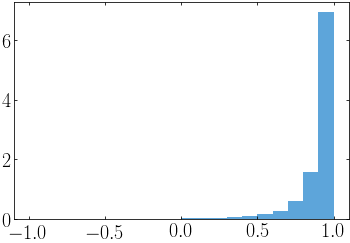

In [39]:
_ = plt.hist(data['mu_vv'][ii], bins=20, density=True)

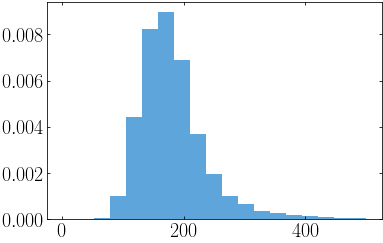

In [41]:
_ = plt.hist(data['vel_AB'][ii], bins=np.linspace(0,500,20), density=True)

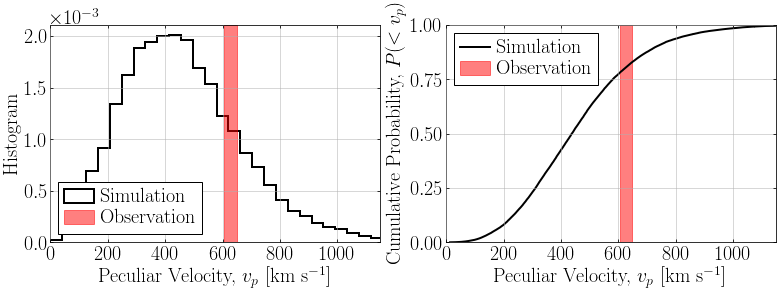

In [58]:
plt.figure(figsize=(13,4))

ax = plt.subplot(1,2,1)
ax.ticklabel_format(style='sci', scilimits=(0,5))

plt.hist(data['vel_A_mag'][ii], 
         bins=np.linspace(0,1200,30),
         density=True, histtype='step', color='black', label='Simulation',
         linewidth=2)
plt.axvspan(vlim['mean']-vlim['sigma'], vlim['mean']+vlim['sigma'], 
            alpha=0.5, color='red', label='Observation')
plt.legend(loc=3)
plt.xticks(np.linspace(0,1200,7))
plt.xlim([0,1150])

plt.grid(linewidth=0.5)

plt.xlabel("Peculiar Velocity, $v_p$ [km s$^{-1}$]")
plt.ylabel("Histogram")

plt.subplot(1,2,2)

plt.axvspan(vlim['mean']-vlim['sigma'], vlim['mean']+vlim['sigma'], 
            alpha=0.5, color='red', label='Observation')

plt.plot(np.sort(data['vel_A_mag'][ii]), 
         np.linspace(0,1,np.count_nonzero(ii)), 
         color='black', label='Simulation')

plt.legend()
plt.grid(linewidth=0.5)
plt.yticks(np.linspace(0,1,5))
plt.xticks(np.linspace(0,1200,7))
plt.xlim([0,1150])
plt.ylim([0,1])
plt.xlabel('Peculiar Velocity, $v_p$ [km s$^{-1}$]')
plt.ylabel("Cumulative Probability, $P(<v_p)$")

plt.savefig("../paper/cumulative_probability.pdf",  bbox_inches="tight")

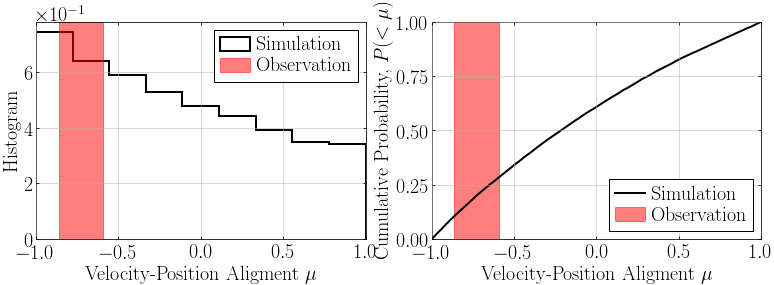

In [59]:
plt.figure(figsize=(13,4))

ax = plt.subplot(1,2,1)
ax.ticklabel_format(style='sci', scilimits=(0,5))

plt.hist(data['mu'][ii], 
         bins=np.linspace(-1,1,10),
         density=True, histtype='step', color='black', label='Simulation',
         linewidth=2)
plt.axvspan(mu['mean']-mu['sigma'], mu['mean']+mu['sigma'], 
            alpha=0.5, color='red', label='Observation')
plt.legend()
plt.xticks(np.linspace(-1,1,5))
plt.xlim([-1,1])

plt.grid(linewidth=0.5)

plt.xlabel('Velocity-Position Aligment $\mu$')
plt.ylabel("Histogram")

plt.subplot(1,2,2)

plt.axvspan(mu['mean']-mu['sigma'], mu['mean']+mu['sigma'], 
            alpha=0.5, color='red', label='Observation')

plt.plot(np.sort(data['mu'][ii]), 
         np.linspace(0,1,np.count_nonzero(ii)), 
         color='black', label='Simulation')

plt.legend()
plt.grid(linewidth=0.5)
plt.yticks(np.linspace(0,1,5))
plt.xticks(np.linspace(-1,1,5))
plt.xlim([-1,1])
plt.ylim([0,1])
plt.xlabel('Velocity-Position Aligment $\mu$')
plt.ylabel("Cumulative Probability, $P(<\mu)$")

plt.savefig("../paper/mu_cumulative_probability.pdf",  bbox_inches="tight")

In [72]:
dtype=[('BoxID', 'i8'), ('individual_total', 'i8'), ('individual_high', 'i8'), 
       ('pair_total', 'i8'), ('pair_high', 'i8'), ('mean_mu_total', 'f8'), ('mean_mu_fast', 'f8'), 
      ('std_mu_total', 'f8'), ('std_mu_fast', 'f8')]
pair_data = np.loadtxt("../data/summary_pair_count.dat", dtype=dtype)

dtype=[('BoxID','i8'), ('hubble', 'f8'), ('omega_de', 'f8'),
      ('omega_m', 'f8'), ('n_s', 'f8'), ('sigma_8', 'f8'), ('w_0', 'f8')]
cosmo_data = np.loadtxt("../data/box_cosmo_params.dat", dtype=dtype)

In [73]:
def plot_ratio(r, ylabel, filename):
    plt.figure(figsize=(24,4))

    labels = {'hubble':'$H_0$', 'omega_de':'$\Omega_{DE}$', 
            'omega_m':'$\Omega_{M}$', 'n_s':'$n_s$', 
            'sigma_8':'$\sigma_8$', 'w_0':'$w_0$'}

    for k, kk in enumerate(labels.keys()):
        print(k, kk)
        plt.subplot(1,6,k+1)
        plt.scatter(cosmo_data[kk], r)
        plt.xlabel(labels[kk])
        if k==0:
            plt.ylabel(ylabel)
    plt.savefig("../paper/{}".format(filename),  bbox_inches="tight")

0 hubble
1 omega_de
2 omega_m
3 n_s
4 sigma_8
5 w_0


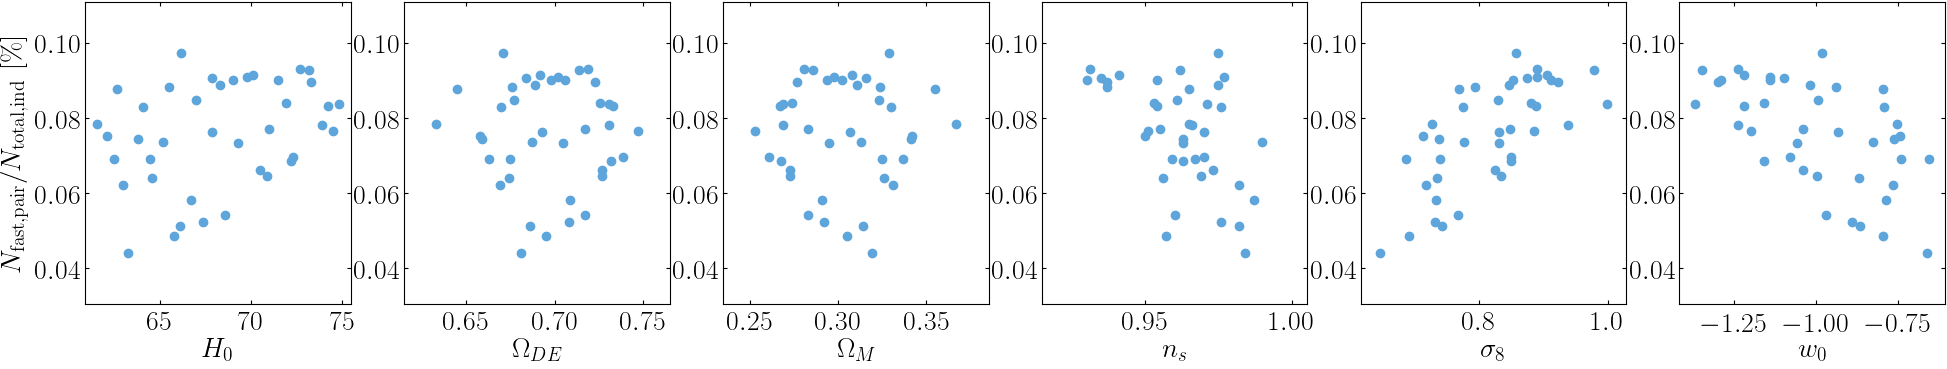

In [103]:
r = 100*pair_data['pair_high']/pair_data['individual_total']
ylabel = r'$N_{\mathrm{fast, pair}}/N_{\mathrm{total, ind}}$ [\%]'
filename = "ratio_pair_high_ind_total.pdf"
plot_ratio(r, ylabel, filename)

0 hubble
1 omega_de
2 omega_m
3 n_s
4 sigma_8
5 w_0


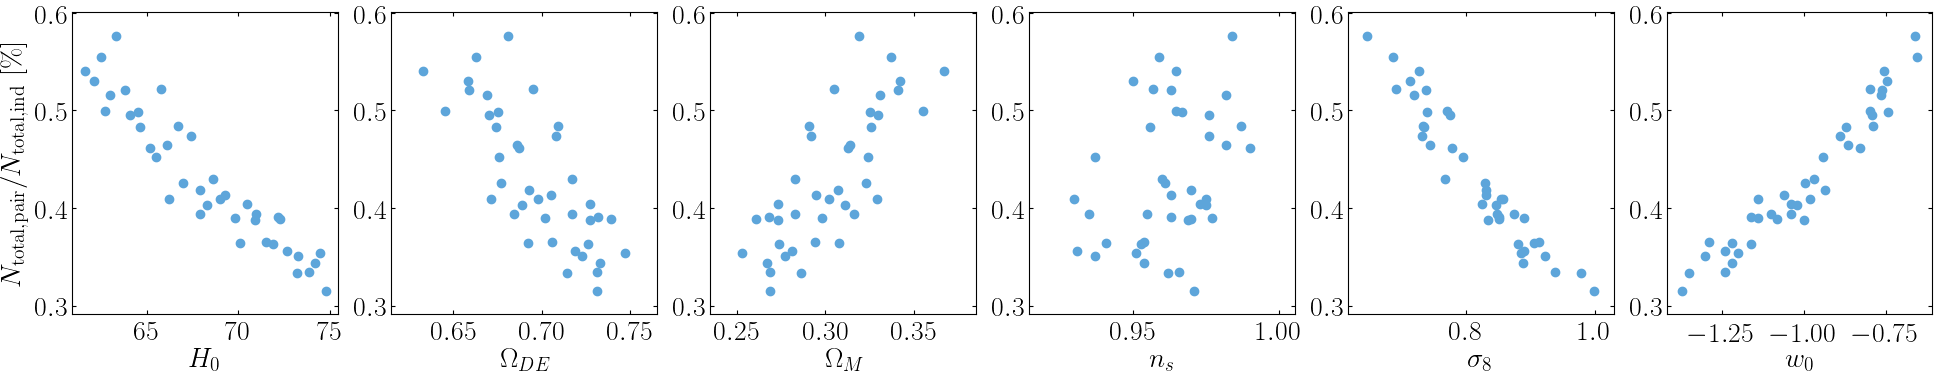

In [75]:
r = 100*pair_data['pair_total']/pair_data['individual_total']
ylabel = r'$N_{\mathrm{total, pair}}/N_{\mathrm{total, ind}}$ [\%]'
filename = "ratio_pair_total_ind_total.pdf"
plot_ratio(r, ylabel, filename)

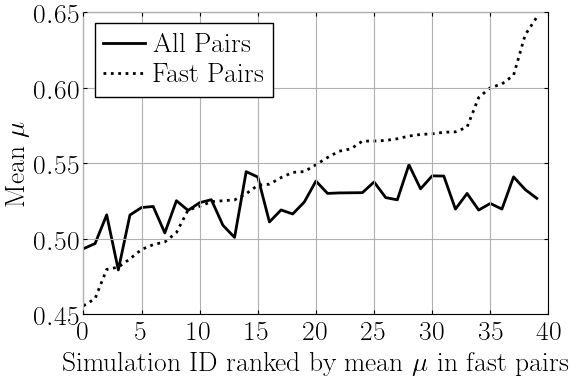

In [104]:
qq = np.argsort(pair_data['mean_mu_fast'])
plt.plot(pair_data['mean_mu_total'][qq], linestyle='-', color='black', label='All Pairs')
plt.plot(pair_data['mean_mu_fast'][qq], linestyle=':', color='black', label='Fast Pairs')

plt.yticks(np.linspace(0.45, 0.65, 5))
plt.xticks(np.linspace(0,40, 9))
plt.grid()
plt.xlim(0,40)
plt.ylim(0.45, 0.65)
plt.ylabel("Mean $\mu$")
plt.xlabel("Simulation ID ranked by mean $\mu$ in fast pairs")
plt.legend()
filename = "mean_mu_in_simulations.pdf"
plt.savefig("../paper/{}".format(filename),  bbox_inches="tight")